In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset/youtube_ad_revenue_dataset.csv")
df_clean = df

In [3]:
df_clean

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [4]:
df_clean.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [6]:
df_clean.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [7]:
df_clean['ad_revenue_usd'].describe()

count    122400.000000
mean        252.727210
std          61.957052
min         126.590603
25%         199.902018
50%         252.749699
75%         305.597518
max         382.768254
Name: ad_revenue_usd, dtype: float64

DATA CLEANING AND EDA

In [8]:
df_clean.groupby('date')['ad_revenue_usd'].sum().sort_values(ascending=False).head(10)

date
2024-09-06 10:50:40.993199    97484.001793
2025-04-03 10:50:40.993199    96530.397314
2025-01-27 10:50:40.993199    96014.821078
2025-05-04 10:50:40.993199    95992.953065
2025-02-10 10:50:40.993199    95979.850207
2024-08-11 10:50:40.993199    95960.460809
2025-02-28 10:50:40.993199    95198.818685
2025-01-28 10:50:40.993199    94689.149720
2024-11-19 10:50:40.993199    94592.592444
2024-08-12 10:50:40.993199    94093.931438
Name: ad_revenue_usd, dtype: float64

<Axes: xlabel='date'>

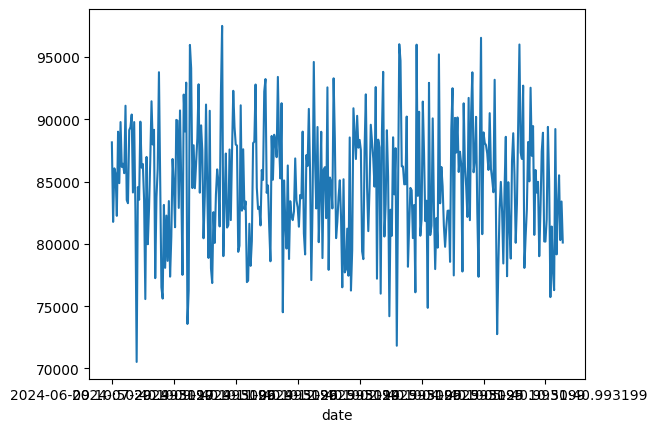

In [9]:
df_clean.groupby('date')['ad_revenue_usd'].sum().plot(kind='line')

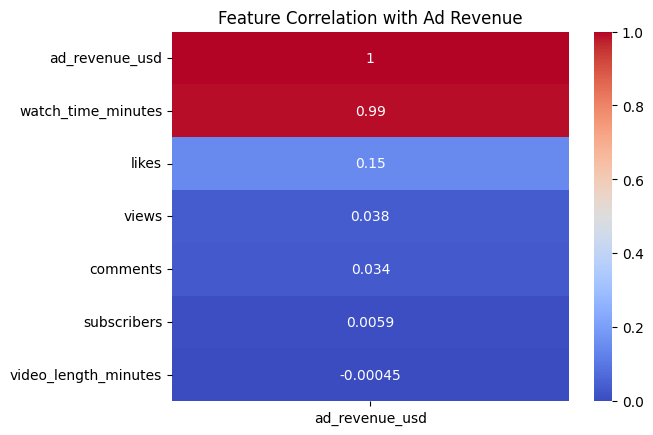

In [10]:
# corr= df_clean.corr(numeric_only=True)
# sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.show()

corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr[['ad_revenue_usd']].sort_values(by='ad_revenue_usd', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Ad Revenue")
plt.show()


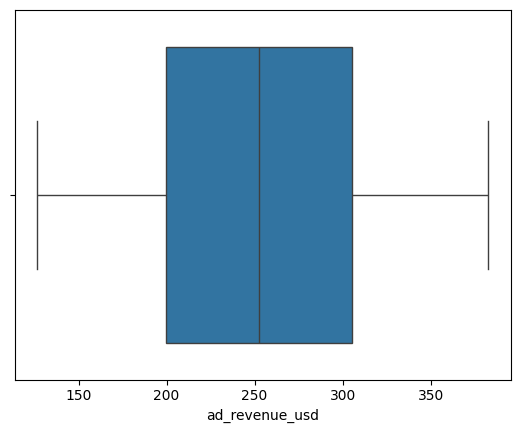

In [11]:
sns.boxplot(x=df_clean['ad_revenue_usd'])
plt.show()

In [12]:
df_clean.groupby('category')['ad_revenue_usd'].mean().sort_values(ascending=False)

category
Gaming           253.507619
Tech             253.473340
Music            252.587527
Education        252.481643
Entertainment    252.445854
Lifestyle        251.860649
Name: ad_revenue_usd, dtype: float64

/tmp/ipykernel_993/2757444204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")


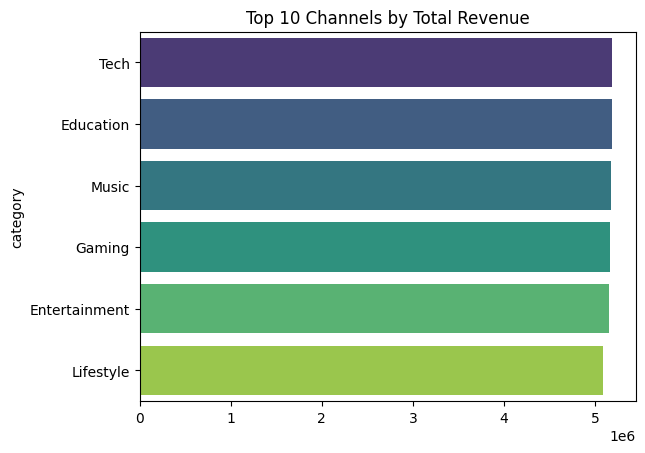

In [13]:
top_channels = df.groupby('category')['ad_revenue_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")
plt.title("Top 10 Channels by Total Revenue")
plt.show()


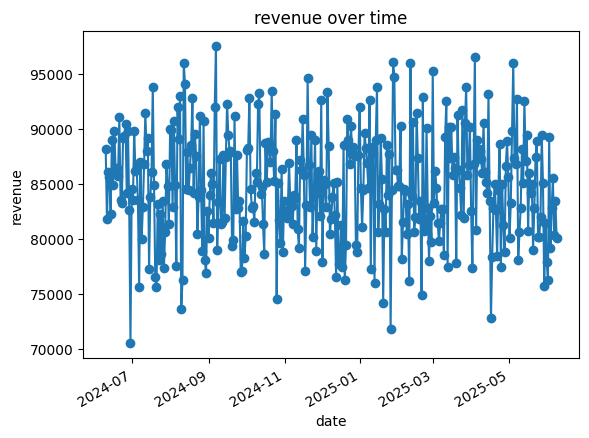

In [14]:
df_clean['date'] = pd.to_datetime(df['date'])
rev_time = df_clean.groupby('date')['ad_revenue_usd'].sum()
rev_time.plot(kind='line', marker='o')
plt.title('revenue over time')
plt.ylabel('revenue')
plt.show()

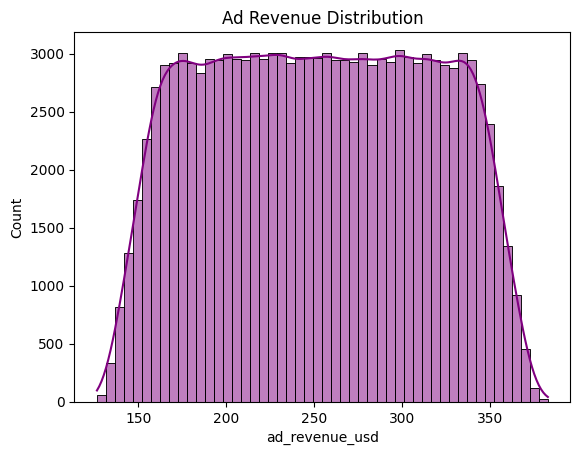

In [15]:
sns.histplot(df_clean['ad_revenue_usd'], bins=50, kde=True, color='purple')
plt.title('Ad Revenue Distribution')
plt.show()

/tmp/ipykernel_993/1320158732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


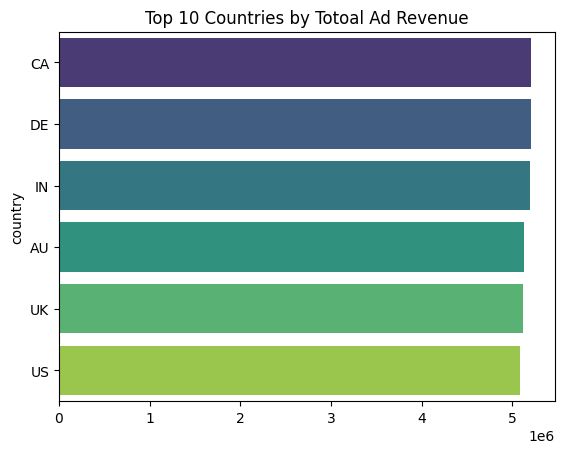

In [16]:
top_countries = df_clean.groupby('country')['ad_revenue_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Totoal Ad Revenue')
plt.show()

/tmp/ipykernel_993/3822361751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device', y='ad_revenue_usd', data=df, estimator=np.mean, palette="Set2")


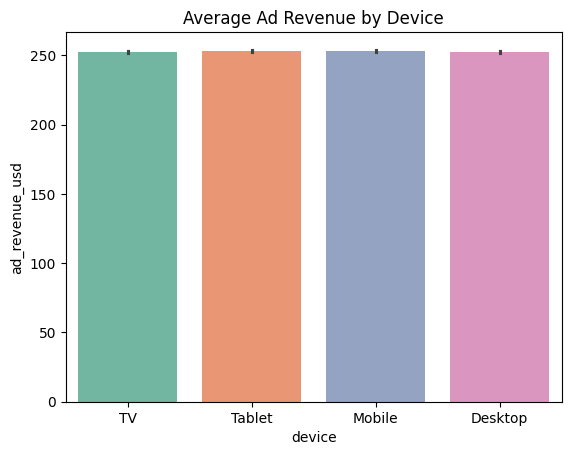

In [17]:
sns.barplot(x='device', y='ad_revenue_usd', data=df, estimator=np.mean, palette="Set2")
plt.title("Average Ad Revenue by Device")
plt.show()


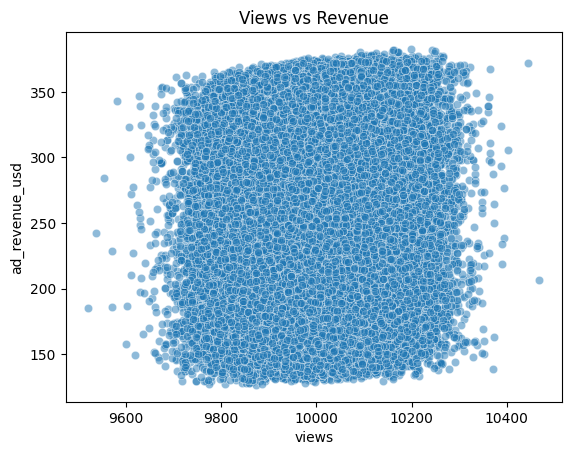

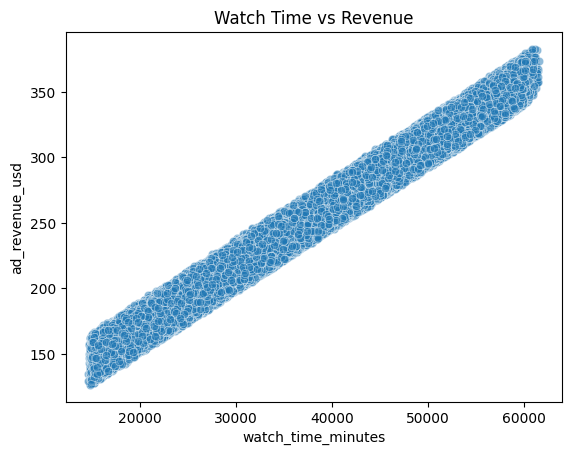

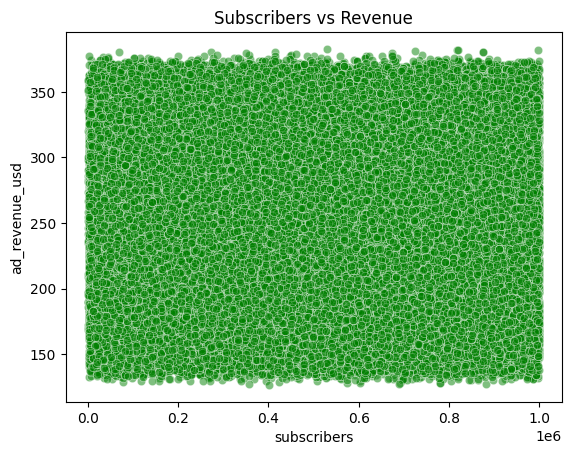

In [18]:
sns.scatterplot(x='views', y='ad_revenue_usd', data= df_clean, alpha=0.5)
plt.title('Views vs Revenue')
plt.show()

sns.scatterplot(x='watch_time_minutes', y='ad_revenue_usd', data= df_clean, alpha=0.5)
plt.title('Watch Time vs Revenue')
plt.show()

sns.scatterplot(x='subscribers', y='ad_revenue_usd', data=df, alpha=0.5, color="green")
plt.title("Subscribers vs Revenue")
plt.show()

In [19]:
df_clean.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [20]:
df['likes'].shape[0]

122400

In [21]:
df_clean.isna().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [22]:
null_rows = df_clean[df_clean['likes'].isnull()]
null_rows

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
9,vid_4434,2025-04-16 10:50:40.993199,10051,NaN,61.0,40011.579945,24.454723,103872,Tech,Tablet,DE,246.711883
10,vid_3493,2025-01-05 10:50:40.993199,9907,NaN,184.0,54008.296832,8.397639,226781,Gaming,Mobile,US,330.219763
41,vid_2414,2024-12-23 10:50:40.993199,9968,NaN,323.0,57697.246168,14.537681,697130,Gaming,TV,CA,349.579266
47,vid_2989,2024-10-02 10:50:40.993199,10001,NaN,414.0,16299.660017,24.193341,124529,Entertainment,Mobile,IN,154.718310
82,vid_3839,2025-03-08 10:50:40.993199,9925,NaN,424.0,51023.879629,21.493743,774823,Music,Tablet,US,323.118349
...,...,...,...,...,...,...,...,...,...,...,...,...
122329,vid_4685,2025-01-11 10:50:40.993199,10085,NaN,241.0,26964.054849,19.235921,737254,Entertainment,TV,AU,194.657184
122337,vid_1985,2025-05-17 10:50:40.993199,9924,NaN,373.0,37828.208105,12.282658,173977,Music,TV,UK,254.112670
122358,vid_2474,2024-11-01 10:50:40.993199,10186,NaN,179.0,28306.948977,24.321599,969755,Entertainment,Desktop,IN,215.573810
122361,vid_27,2025-02-07 10:50:40.993199,10087,NaN,493.0,29562.179099,21.663958,48588,Music,TV,CA,223.760159


In [23]:
median_likes = df_clean['likes'].median()
df_clean['likes'] = df_clean['likes'].fillna(median_likes)
df_clean.isnull().sum()

video_id                   0
date                       0
views                      0
likes                      0
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [24]:
median_watch_time = df_clean['watch_time_minutes'].median()
df_clean['watch_time_minutes'] = df_clean['watch_time_minutes'].fillna(median_watch_time)
df_clean.isnull().sum()

video_id                   0
date                       0
views                      0
likes                      0
comments                6112
watch_time_minutes         0
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [25]:
df_clean.isnull().sum()

video_id                   0
date                       0
views                      0
likes                      0
comments                6112
watch_time_minutes         0
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [26]:
df_clean

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [27]:
median_comments = df_clean['comments'].median()
df_clean['comments'] = df_clean['comments'].fillna(median_comments)
df_clean.isnull().sum()


video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

FEATURE ENGINEERING

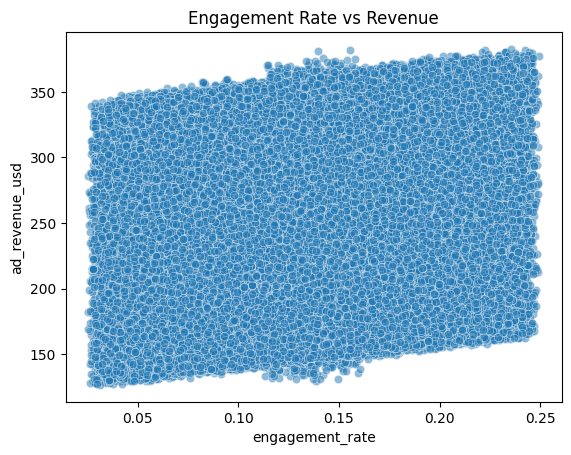

In [28]:
df_clean['engagement_rate'] = (df_clean['likes']+df_clean['comments'])/ df_clean['views']
sns.scatterplot(x='engagement_rate', y='ad_revenue_usd', data=df_clean, alpha=0.5)
plt.title('Engagement Rate vs Revenue')
plt.show()

In [29]:
df_clean.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
engagement_rate         0
dtype: int64

In [30]:
# df_clean['revenue_per_view'] = df_clean['ad_revenue_usd']/df_clean['views']
# df_clean.isnull().sum()
# df_clean

In [31]:
df_clean['views_per_subscriber'] = df_clean['views']/(df_clean['subscribers']+1)
df_clean

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,views_per_subscriber
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,0.043562
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,0.013610
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,0.041977
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814,0.023094
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121,0.235279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715,0.046737
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961,0.011524
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094867,0.017801
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164,0.017500


In [32]:
df_clean['avg_watch_time'] = df_clean['watch_time_minutes']/df_clean['views']

In [33]:
df_clean['log_views'] = np.log1p(df_clean['views'])
# df_clean['log_revenue'] = np.log1p(df_clean['ad_revenue_usd'])
df_clean

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,views_per_subscriber,avg_watch_time,log_views
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,0.043562,2.666789,9.204020
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,0.013610,1.518393,9.212139
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,0.041977,5.678187,9.220093
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814,0.023094,3.122834,9.213834
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121,0.235279,1.584151,9.199279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715,0.046737,4.270345,9.195633
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961,0.011524,5.683620,9.223158
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094867,0.017801,2.683327,9.236788
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164,0.017500,5.563221,9.234155


In [34]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['dayofweek'] = df_clean['date'].dt.dayofweek  
df_clean['is_weekend'] = df_clean['dayofweek'].isin([5,6]).astype(int)
df_clean[['date', 'year', 'month', 'dayofweek', 'is_weekend']].head()

,date,year,month,dayofweek,is_weekend
0,2024-09-24 10:50:40.993199,2024,9,1,0
1,2024-09-22 10:50:40.993199,2024,9,6,1
2,2024-11-21 10:50:40.993199,2024,11,3,0
3,2025-01-28 10:50:40.993199,2025,1,1,0
4,2025-04-28 10:50:40.993199,2025,4,0,0


In [35]:
df_clean.drop(['video_id', 'date'], axis=1, inplace=True)

In [36]:
df_clean.to_csv("youtube_data_cleaned.csv", index=False)

In [37]:
# cat_dummies = pd.get_dummies(df_clean['category'], prefix='cat', drop_first=True)
# dev_dummies = pd.get_dummies(df_clean['device'], prefix='dev', drop_first=True)
# cty_dummies = pd.get_dummies(df_clean['country'], prefix='cty', drop_first=True)

# # Merge encoded data
# df_clean = pd.concat([df_clean.drop(['category','device','country'], axis=1),
#                         cat_dummies, dev_dummies, cty_dummies], axis=1)
# df_clean.head()
df_clean = pd.get_dummies(df_clean, drop_first=True)

LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



target = 'ad_revenue_usd'
features = [col for col in df_clean.columns if col != target]

X = df_clean[features]
y = df_clean[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)           
y_pred_lr = lr.predict(X_test)   
print("\n--- Linear Regression ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))



--- Linear Regression ---
R²: 0.948197450038631
MAE: 3.3176537801712853
MSE: 198.63332104934454


RIDGE REGRESSION

In [ ]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n--- Ridge Regression ---")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))



--- Ridge Regression ---
R²: 0.9481999055464316
MAE: 3.3139807660265914
MSE: 198.62390557327856


LASSO REGRESSION

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\n--- Lasso Regression ---")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))



--- Lasso Regression ---
R²: 0.9482140552841599
MAE: 3.2749621486476364
MSE: 198.56964937548437


RANDOM FOREST


--- Random Forest ---
R²: 0.9480539395041833
MAE: 3.6639398474907043
MSE: 199.18360234021105


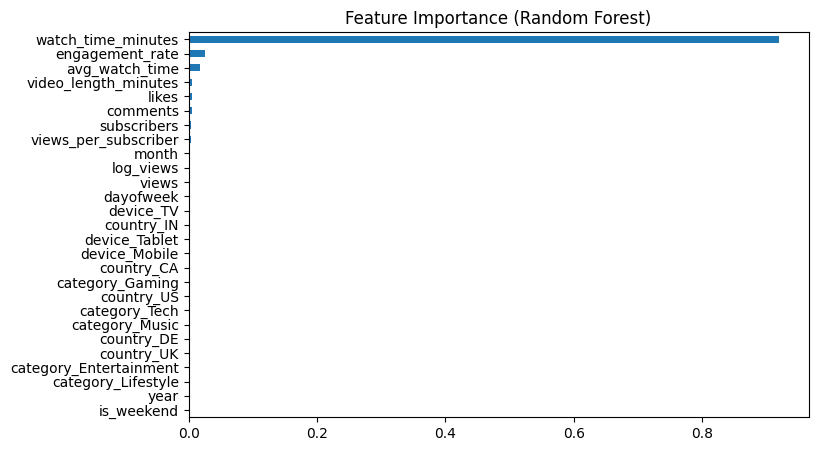

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


GRADIENT BOOSTING REGRESSOR

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\n--- Gradient Boosting ---")
print("R²:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))



--- Gradient Boosting ---
R²: 0.948030458255486
MAE: 3.8305043319520284
MSE: 199.27363957611155


In [43]:
features

['views',
 'likes',
 'comments',
 'watch_time_minutes',
 'video_length_minutes',
 'subscribers',
 'engagement_rate',
 'views_per_subscriber',
 'avg_watch_time',
 'log_views',
 'year',
 'month',
 'dayofweek',
 'is_weekend',
 'category_Entertainment',
 'category_Gaming',
 'category_Lifestyle',
 'category_Music',
 'category_Tech',
 'device_Mobile',
 'device_TV',
 'device_Tablet',
 'country_CA',
 'country_DE',
 'country_IN',
 'country_UK',
 'country_US']

/tmp/ipykernel_993/570875170.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=rf_importances.index, palette="viridis")


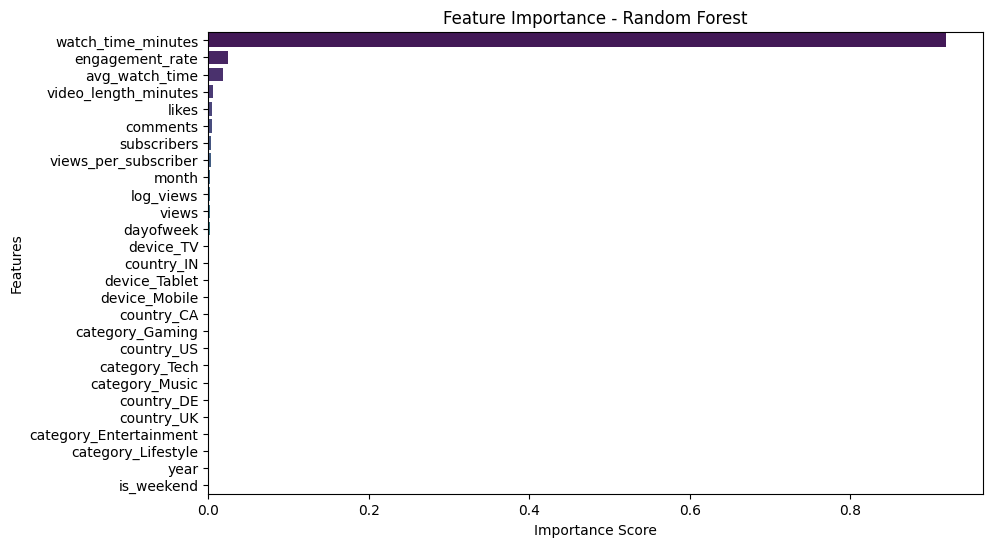

/tmp/ipykernel_993/570875170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_importances, y=gb_importances.index, palette="magma")


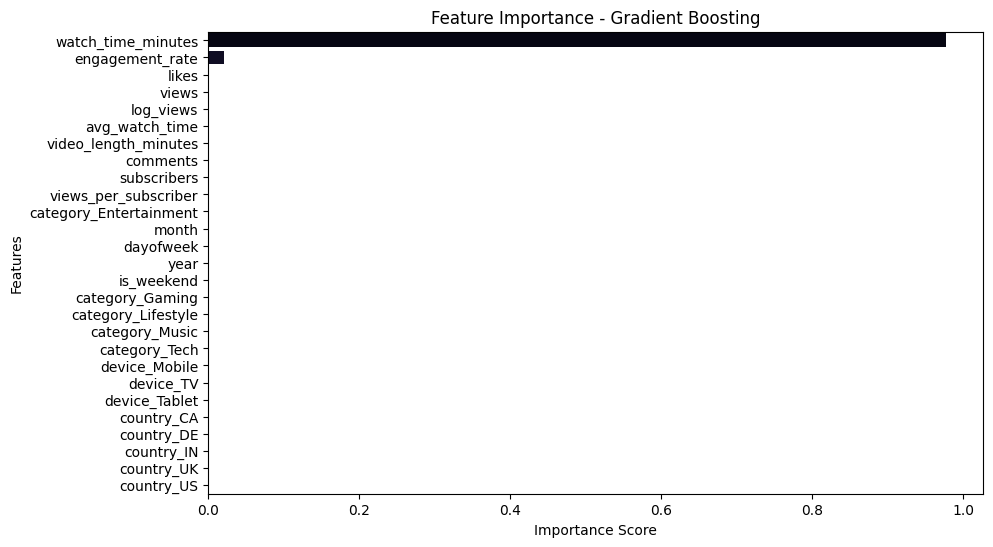

In [ ]:
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=rf_importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


gb_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
gb_importances = gb_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gb_importances, y=gb_importances.index, palette="magma")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [45]:
# # -------------------------------
# # Define models
# # -------------------------------
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge': Ridge(alpha=1.0),
#     'Lasso': Lasso(alpha=0.1),
#     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
# }

# results = pd.DataFrame(columns=['Model', 'R-squared', 'MAE', 'MSE'])

# print("--- Model Performance on Test Data ---")
# for name, model in models.items():
#     print(f"\nTraining and evaluating {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Metrics
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)

#     results = pd.concat([results, pd.DataFrame([{
#         'Model': name, 'R-squared': r2, 'MAE': mae, 'MSE': mse
#     }])], ignore_index=True)

# # -------------------------------
# # Display comparison
# # -------------------------------
# print("\n--- Model Comparison (with watch_time_minutes) ---")
# print(results.to_string(index=False))

# # -------------------------------
# # Cross-validation (Random Forest as example)
# # -------------------------------
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
# print("\nCross-validated R²:", scores.mean(), scores)

# # -------------------------------
# # Feature importance (Random Forest)
# # -------------------------------
# rf.fit(X_train, y_train)
# importances = pd.Series(rf.feature_importances_, index=X.columns)

# plt.figure(figsize=(8, 5))
# importances.sort_values().plot(kind='barh')
# plt.title("Feature Importance (Random Forest)")
# plt.show()


In [46]:

# joblib.dump(rf, "model.pkl")

In [47]:
# import joblib
# m = joblib.load("model.pkl")
# print(type(m))



In [48]:
# import joblib

# try:
#     model = joblib.load("revenue_model.pkl")
#     print("Model loaded successfully")
# except Exception as e:
#     print("Error:", e)


In [49]:
model = y_pred_rf 

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['category', 'device', 'country']  # adjust to your dataset
numeric_features = ['views', 'likes', 'comments', 'subscribers', 'video_length_minutes', 'watch_time_minutes']

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
], remainder="passthrough")

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['category', 'device', 'country'])])